# Practica: Prediccion Precio Viviendas Airbnb

En este notebook realizaremos un proyecto de Machine Learning en el que utilizaremos los conceptos y tecnicas aprendidas durante el modulo de 'Machine Learning 101' del Bootcamp de Keepcoding.

Se trata de un problema de regresión, en el que prediciremos el precio final de ciertas viviendas de Airbnb teniendo en cuenta sus caracteristicas.

## Librerias y Funciones

Cargamos las librerias y funciones que utilizaremos a lo largo del notebook

In [1]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import seaborn as sns

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

pd.set_option('display.max_columns', None)

Using TensorFlow backend.


## Carga del Dataset y Analisis Exploratorio de los Datos

En esta seccion, haremos un filtrado de las dimensiones relevantes para la prediccion del precio de la vivienda. Así como un tratamiento de los valores nulos para las columnas que mantengamos, filtrandolos en algunos casos y transformandolos en otros.

In [0]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('airbnb-listings.csv', sep=';', decimal='.')
train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)

In [4]:
train.shape

(11824, 89)

In [5]:
test.shape

(2956, 89)

Guardamos los datasets de training y testing, y trabajamos unicamente con el de training

In [0]:
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)

In [0]:
df = pd.read_csv('./train.csv', sep=';', decimal='.')

In [8]:
df.head().T

,0,1,2,3,4
ID,7070725,522563,17620146,17120956,2876761
Listing Url,https://www.airbnb.com/rooms/7070725,https://www.airbnb.com/rooms/522563,https://www.airbnb.com/rooms/17620146,https://www.airbnb.com/rooms/17120956,https://www.airbnb.com/rooms/2876761
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Christmas room at Madrid bar street,Beautiful loft in downtown Madrid,Beautiful room in Madrid's center,Trendy Central Double Bedroom,"STUDIO LOW COST GRAN VIA, 3 PAX;"
...,...,...,...,...,...
Cancellation Policy,moderate,strict,strict,flexible,strict
Calculated host listings count,1,2,26,2,5
Reviews per Month,0.28,1.25,NaN,NaN,0.51
Geolocation,"40.4078728775,-3.6959535794","40.4104057925,-3.71092202762","40.420119399,-3.70647203428","40.4170731843,-3.70261776301","40.4205167894,-3.70618911243"


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11824.0,1.028796e+07,5.566144e+06,1.862800e+04,5.554202e+06,1.137933e+07,1.531774e+07,1.910969e+07
Scrape ID,11824.0,2.017037e+13,5.985295e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,11824.0,3.604487e+07,3.420733e+07,1.745300e+04,6.852398e+06,2.442384e+07,5.436342e+07,1.247534e+08
Host Response Rate,10315.0,9.485681e+01,1.503206e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,11822.0,1.257114e+01,3.440231e+01,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,5.190000e+02
Host Total Listings Count,11822.0,1.257114e+01,3.440231e+01,0.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00,5.190000e+02
Latitude,11824.0,4.051702e+01,4.450387e+00,-3.785118e+01,4.040980e+01,4.041949e+01,4.043101e+01,5.596691e+01
Longitude,11824.0,-4.031593e+00,1.425322e+01,-1.231313e+02,-3.707647e+00,-3.700778e+00,-3.684351e+00,1.533714e+02
Accommodates,11824.0,3.265139e+00,2.076515e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,11779.0,1.280032e+00,6.559396e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [10]:
df.dtypes

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

## Primer Filtrado Manual

Se llevan a cabo una primera seleccion de las variables potencialmente relevantes. Quedandonos con 36 variables.

In [11]:
df.head(10)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,7070725,https://www.airbnb.com/rooms/7070725,20170407214119,2017-04-08,Christmas room at Madrid bar street,"Perfect location, 3 minutes from Reina Sofia m...",It is shared flar where 4 people live in. They...,"Perfect location, 3 minutes from Reina Sofia m...",none,NaN,NaN,NaN,"You will have accces to kithen, bathroom, our ...",The rommates are very good people but most of ...,NaN,https://a0.muscache.com/im/pictures/16496e5c-e...,https://a0.muscache.com/im/pictures/16496e5c-e...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/16496e5c-e...,37072666,https://www.airbnb.com/users/show/37072666,Tatiana,2015-06-29,"Madrid, Community of Madrid, Spain",I am journalist working in international non-p...,NaN,NaN,NaN,https://a0.muscache.com/im/users/37072666/prof...,https://a0.muscache.com/im/users/37072666/prof...,Embajadores,1.0,1.0,"email,phone,reviews","Embajadores, Madrid, Comunidad de Madrid 28012...",Embajadores,Embajadores,Centro,Madrid,Comunidad de Madrid,28012,Madrid,"Madrid, Spain",ES,Spain,40.407873,-3.695954,Apartment,Private room,2,2.0,1.0,1.0,Real Bed,"Wireless Internet,Kitchen,Smoking allowed,Door...",NaN,21.0,NaN,NaN,NaN,NaN,1,5,3,10,5 days ago,NaN,0,0,0,0,2017-04-08,6,2015-07-12,2016-01-25,83.0,8.0,6.0,8.0,9.0,10.0,9.0,NaN,NaN,moderate,1.0,0.28,"40.4078728775,-3.6959535794","Host Has Profile Pic,Is Location Exact,Require..."
1,522563,https://www.airbnb.com/rooms/522563,20170407214119,2017-04-08,Beautiful loft in downtown Madrid,"Stylish Loft in La Latina district, in central...",I welcome you to my beautiful loft in the hist...,"Stylish Loft in La Latina district, in central...",none,The loft is located in La Latina historic dist...,"Towels, linens, soap, shampoo, etc are at your...","A) from the airport by bus: from T1, T2, T3, T...","you can access the entire loft: two bedrooms, ...","I will attend my guests for check in/ out, an...",PARTIES ARE STRICTLY FORBIDDEN. Guests must b...,NaN,NaN,https://public.opendatasoft.com/api/v2/catalog...,NaN,1652272,https://www.airbnb.com/users/show/1652272,Xuan,2012-01-25,"Madrid, Madrid, Spain",I am a kind person who loves meeting new peopl...,within a few hours,100.0,NaN,https://a0.muscache.com/im/users/1652272/profi...,https://a0.muscache.com/im/users/1652272/profi...,La Latina,2.0,2.0,"email,phone,reviews,jumio","La Latina, Madrid, Madrid 28005, Spain",La Latina,Palacio,Centro,Madrid,Madrid,28005,Madrid,"Madrid, Spain",ES,Spain,40.410406,-3.710922,Apartment,Entire home/apt,6,1.0,2.0,4.0,Real Bed,"TV,Cable TV,Wireless Internet,Wheelchair acces...",NaN,59.0,499.0,1999.0,100.0,19.0,2,19,2,30,yesterday,NaN,13,32,60,119,2017-04-08,39,2014-09-16,2017-03-26,92.0,10.0,9.0,10.0,10.0,10.0,9.0,NaN,NaN,strict,2.0

In [12]:
df.shape

(11824, 89)

In [0]:
features = 'Experiences Offered, Review Scores Communication, Review Scores Location, Review Scores Value, Review Scores Rating, Review Scores Accuracy, License, Jurisdiction Names, Cancellation Policy, Calculated host listings count, Reviews per Month, Host Since, Host Location, Host Response Time, Host Response Rate, Host Neighbourhood, Host Total Listings Count, Host Verifications, Latitude, Longitude, Property Type, Room Type, Bathrooms, Bedrooms, Beds, Bed Type, Amenities, Square Feet, Price, Security Deposit, Cleaning Fee, Guests Included, Extra People, Minimum Nights, Maximum Nights, Number of Reviews'

In [0]:
features = features.split(', ')

In [15]:
features

['Experiences Offered',
 'Review Scores Communication',
 'Review Scores Location',
 'Review Scores Value',
 'Review Scores Rating',
 'Review Scores Accuracy',
 'License',
 'Jurisdiction Names',
 'Cancellation Policy',
 'Calculated host listings count',
 'Reviews per Month',
 'Host Since',
 'Host Location',
 'Host Response Time',
 'Host Response Rate',
 'Host Neighbourhood',
 'Host Total Listings Count',
 'Host Verifications',
 'Latitude',
 'Longitude',
 'Property Type',
 'Room Type',
 'Bathrooms',
 'Bedrooms',
 'Beds',
 'Bed Type',
 'Amenities',
 'Square Feet',
 'Price',
 'Security Deposit',
 'Cleaning Fee',
 'Guests Included',
 'Extra People',
 'Minimum Nights',
 'Maximum Nights',
 'Number of Reviews']

In [0]:
df = df[features]

In [17]:
df.shape

(11824, 36)

In [0]:
df.to_csv('./filtered_training_data.csv', sep=';', decimal='.', index=False)

## Analisis Exploratorio de los Datos

### Resumen Estadistico de la Variable Objetivo

In [19]:
df.Price.describe()

count    11812.000000
mean        73.329072
std         71.830717
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

### Exploracion de las Caracteristicas

In [0]:
def price_mean(column):
    return df.groupby(column).agg({'Price': 'mean'})

def unique(column):
    return df[column].unique()

Con el siguiente codigo haremos un analisis de los datos de cada caracteristica, con el fin de determinar que variables tienen variables nulos o que no corresponden con los que deberían y posteriormente los trataremos.

In [21]:
for col in df.columns:
    print(price_mean(col))
    print(unique(col))

                          Price
Experiences Offered            
business             193.857143
family               229.500000
none                  73.236735
romantic              86.500000
social                42.333333
['none' 'business' 'romantic' 'social' 'family']
                                 Price
Review Scores Communication           
2.0                          61.789474
4.0                          58.823529
5.0                          82.000000
6.0                          86.173077
7.0                          64.930556
8.0                          67.783626
9.0                          66.670300
10.0                         70.997658
[ 9. 10. nan  8.  7.  6.  4.  2.  5.]
                            Price
Review Scores Location           
2.0                     51.666667
4.0                     42.000000
5.0                     71.625000
6.0                     72.328571
7.0                     45.703704
8.0                     57.452496
9.0                     60.

Tras hacer un analisis y ver que hay ciertas variables cuyos diferentes valores apenas tienen correlación con la variable objetivo (por que la media se mantiene cte). Procederemos a eliminarlas

In [0]:
data = pd.read_csv('filtered_training_data.csv', sep=';', decimal='.')

In [0]:
data = data.drop(['License', 'Host Since', 'Host Location', 'Host Response Rate', 'Host Response Time', 'Host Verifications', 'Amenities', 'Maximum Nights'], axis=1)


In [24]:
data.shape

(11824, 28)

In [25]:
data.columns

Index(['Experiences Offered', 'Review Scores Communication',
       'Review Scores Location', 'Review Scores Value', 'Review Scores Rating',
       'Review Scores Accuracy', 'Jurisdiction Names', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month',
       'Host Neighbourhood', 'Host Total Listings Count', 'Latitude',
       'Longitude', 'Property Type', 'Room Type', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Square Feet', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews'],
      dtype='object')

Ahora, reemplazaremos valores que no interesan y eliminaremos filas con valores nulos.

In [0]:
data['Jurisdiction Names'] = data['Jurisdiction Names'].fillna('None')
data['Calculated host listings count'] = data['Calculated host listings count'].replace(99999, 0)
data['Reviews per Month'] = data['Reviews per Month'].replace('0', 0)
data['Host Neighbourhood'] = data['Host Neighbourhood'].fillna('No data')
data['Security Deposit'] = data['Security Deposit'].fillna(0)
data['Cleaning Fee'] = data['Cleaning Fee'].fillna(0)
data['Review Scores Location'] = data['Review Scores Location'].fillna(0)
data['Review Scores Communication'] = data['Review Scores Communication'].fillna(0)
data['Review Scores Value'] = data['Review Scores Value'].fillna(0)
data['Review Scores Rating'] = data['Review Scores Rating'].fillna(0)
data['Review Scores Accuracy'] = data['Review Scores Accuracy'].fillna(0)
data['Reviews per Month'] = data['Reviews per Month'].fillna(0)

In [0]:
data = data[pd.notnull(data['Price'])]
data = data[pd.notnull(data['Bedrooms'])]
data = data[pd.notnull(data['Bathrooms'])]
data = data[pd.notnull(data['Host Total Listings Count'])]
data = data[pd.notnull(data['Calculated host listings count'])]

Para comprobar si tenemos alguna caracteristica con valores nulos

In [66]:
for column in data.columns:
    if data[column].isnull().values.any() == True:
        print(column,)

Beds
Square Feet


In [0]:
data['Beds'] = data['Beds'].fillna(data.Beds.mean())
data['Square Feet'] = data['Square Feet'].fillna(data['Square Feet'].mean())

In [68]:
data.shape

(11741, 28)

In [0]:
data.to_csv('cleansed_training_data.csv', sep=';', decimal='.', index=False)

## Correlation Analysis

In [0]:
numeric_data = data.select_dtypes(['number'])

In [0]:
cols = numeric_data.columns

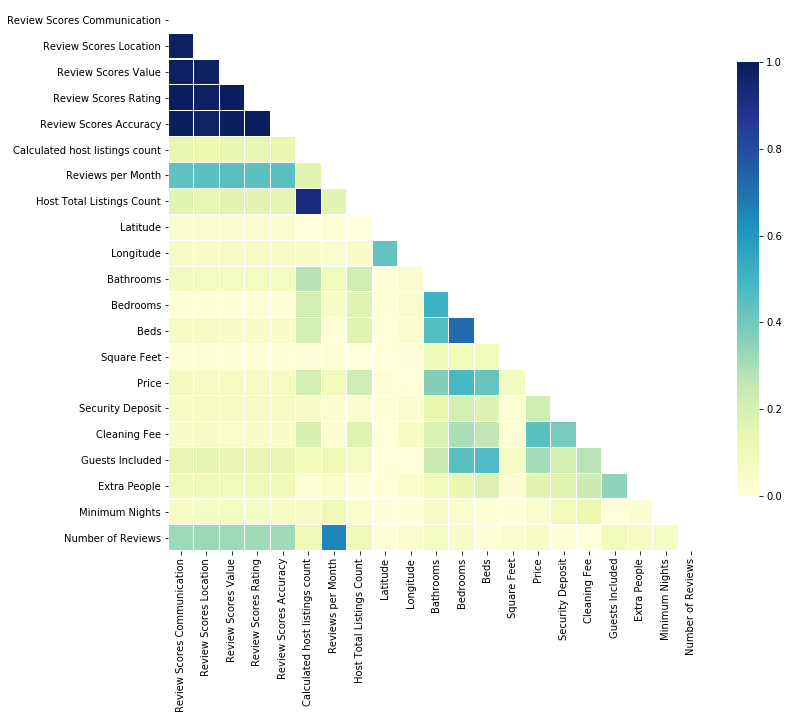

In [72]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(numeric_data.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

Observamos que con respecto a la variable objetivo, tan solo están altamente correladas las caracteristicas numericas de:

    - Numero de habitaciones
    - Numero de camas
    - Número de baños
    
Ahora, exploraremos las variables nuumericas

## Train Test Split & Feature Engineering

En esta seccion llevaremos a cabo el tratamiento apropiado de las dimensiones. Para las variables categoricas realizaremos la tecnica de One-Hot Encoding (que explicaremos mas adelante) y para las variables numericas realizaremos un escalado.

In [0]:
X_train = data.drop('Price', axis=1)
y_train = data.Price

In [0]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [75]:
numeric_cols = cols.drop('Price')
cols

Index(['Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Review Scores Rating', 'Review Scores Accuracy',
       'Calculated host listings count', 'Reviews per Month',
       'Host Total Listings Count', 'Latitude', 'Longitude', 'Bathrooms',
       'Bedrooms', 'Beds', 'Square Feet', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Number of Reviews'],
      dtype='object')

In [0]:
categorical = []
for col in X_train:
  if col not in numeric_cols:
    categorical.append(col)

In [0]:
numerical_data = X_train[numeric_cols]
X_train[numeric_cols] = scaler.fit_transform(numerical_data)

In [0]:
data = pd.read_csv('train.csv', sep=';', decimal='.')

In [0]:
data = data[features]
data = data.drop(['License', 'Host Since', 'Host Location', 'Host Response Rate', 'Host Response Time', 'Host Verifications', 'Amenities', 'Maximum Nights'], axis=1)
data['Jurisdiction Names'] = data['Jurisdiction Names'].fillna('None')
data['Calculated host listings count'] = data['Calculated host listings count'].replace(99999, 0)
data['Reviews per Month'] = data['Reviews per Month'].replace('0', 0)
data['Host Neighbourhood'] = data['Host Neighbourhood'].fillna('No data')
data['Security Deposit'] = data['Security Deposit'].fillna(0)
data['Cleaning Fee'] = data['Cleaning Fee'].fillna(0)
data['Review Scores Location'] = data['Review Scores Location'].fillna(0)
data['Review Scores Communication'] = data['Review Scores Communication'].fillna(0)
data['Review Scores Value'] = data['Review Scores Value'].fillna(0)
data['Review Scores Rating'] = data['Review Scores Rating'].fillna(0)
data['Review Scores Accuracy'] = data['Review Scores Accuracy'].fillna(0)
data['Reviews per Month'] = data['Reviews per Month'].fillna(0)
data = data[pd.notnull(data['Price'])]
data = data[pd.notnull(data['Bedrooms'])]
data = data[pd.notnull(data['Bathrooms'])]
data = data[pd.notnull(data['Host Total Listings Count'])]
data = data[pd.notnull(data['Calculated host listings count'])]
data['Beds'] = data['Beds'].fillna(data.Beds.mean())
data['Square Feet'] = data['Square Feet'].fillna(data['Square Feet'].mean())

mean_map = {}
for c in categorical:
    mean = data.groupby(c)['Price'].mean()
    data[c] = data[c].map(mean)    
    mean_map[c] = mean

X_train = data.drop('Price', axis=1)
y_train = data.Price

numerical_data = X_train[numeric_cols]
X_train[numeric_cols] = scaler.fit_transform(numerical_data)

In [0]:
X_train.dtypes
categorical_cols = ['Experiences Offered', 'Jurisdiction Names', 'Cancellation Policy', 'Host Neighbourhood']

In [114]:
categorical_cols

['Experiences Offered',
 'Jurisdiction Names',
 'Cancellation Policy',
 'Host Neighbourhood']

In [115]:
X_train.shape

(11741, 27)

In [116]:
y_train.shape

(11741,)

In [84]:
X_train.head().T

,0,1,2,3,4
Experiences Offered,7.332242e+01,7.332242e+01,7.332242e+01,7.332242e+01,7.332242e+01
Review Scores Communication,3.676201e-01,6.133629e-01,-1.844066e+00,-1.844066e+00,1.218772e-01
Review Scores Location,6.450183e-01,6.450183e-01,-1.836277e+00,-1.836277e+00,3.968888e-01
Review Scores Value,4.689666e-01,4.689666e-01,-1.819008e+00,-1.819008e+00,2.147473e-01
Review Scores Rating,2.983163e-01,5.296864e-01,-1.835430e+00,-1.835430e+00,2.211930e-01
Review Scores Accuracy,1.704491e-01,6.700729e-01,-1.828046e+00,-1.828046e+00,1.704491e-01
Jurisdiction Names,7.268443e+01,7.268443e+01,7.268443e+01,7.268443e+01,7.268443e+01
Cancellation Policy,6.545140e+01,8.635224e+01,8.635224e+01,6.373339e+01,8.635224e+01
Calculated host listings count,-3.609884e-01,-3.184294e-01,7.029863e-01,-3.184294e-01,-1.907524e-01
Reviews per Month,-6.533149e-01,-1.205643e-01,-8.070985e-01,-8.070985e-01,-5.269926e-01


## Preparing Testing Data

In [0]:
data = pd.read_csv('test.csv', sep=';', decimal='.')

In [0]:
data = data[features]
data = data.drop(['License', 'Host Since', 'Host Location', 'Host Response Rate', 'Host Response Time', 'Host Verifications', 'Amenities', 'Maximum Nights'], axis=1)
data['Jurisdiction Names'] = data['Jurisdiction Names'].fillna('None')
data['Calculated host listings count'] = data['Calculated host listings count'].replace(99999, 0)
data['Reviews per Month'] = data['Reviews per Month'].replace('0', 0)
data['Host Neighbourhood'] = data['Host Neighbourhood'].fillna('No data')
data['Security Deposit'] = data['Security Deposit'].fillna(0)
data['Cleaning Fee'] = data['Cleaning Fee'].fillna(0)
data['Review Scores Location'] = data['Review Scores Location'].fillna(0)
data['Review Scores Communication'] = data['Review Scores Communication'].fillna(0)
data['Review Scores Value'] = data['Review Scores Value'].fillna(0)
data['Review Scores Rating'] = data['Review Scores Rating'].fillna(0)
data['Review Scores Accuracy'] = data['Review Scores Accuracy'].fillna(0)
data['Reviews per Month'] = data['Reviews per Month'].fillna(0)
data = data[pd.notnull(data['Price'])]
data = data[pd.notnull(data['Bedrooms'])]
data = data[pd.notnull(data['Bathrooms'])]
data = data[pd.notnull(data['Host Total Listings Count'])]
data = data[pd.notnull(data['Calculated host listings count'])]
data['Beds'] = data['Beds'].fillna(data.Beds.mean())
data['Square Feet'] = data['Square Feet'].fillna(data['Square Feet'].mean())

mean_map = {}
for c in categorical:
    mean = data.groupby(c)['Price'].mean()
    data[c] = data[c].map(mean)    
    mean_map[c] = mean

X_test = data.drop('Price', axis=1)
y_test = data.Price

numerical_data = X_test[numeric_cols]
X_test[numeric_cols] = scaler.transform(numerical_data)

In [95]:
X_test.shape

(2936, 27)

In [107]:
y_test.shape

(2936,)

In [109]:
X_train.shape

(11741, 249)

In [110]:
X_test.shape

(2936, 27)

## Diseño Red Neuronal

Al tratarse de un problema de regresión, utilizaremos redes neuronales básicas en el modelo. La arquitectura de esta red neuronal constará de:

- Una capa de entrada densa, con función de activación ReLU
- Tres capas ocultas densas, con función de activación ReLU
- Una capa de salida densa, con función de activación lineal

Como función de conste utilizaremos la Mean Absolute Error y optimizador adam.

In [117]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               3584      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 168,449
Trainable params: 168,449
Non-trainable params: 0
_________________________________________________________________


## Definicion de Checkpoint

In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

# Entramiento de la Red

In [118]:
NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 9392 samples, validate on 2349 samples
Epoch 1/100
9392/9392 [==============================] - 2s 183us/step - loss: 28.2888 - mean_absolute_error: 28.2888 - val_loss: 25.3674 - val_mean_absolute_error: 25.3674

Epoch 00001: val_loss improved from inf to 25.36741, saving model to Weights-001--25.36741.hdf5
Epoch 2/100
9392/9392 [==============================] - 1s 140us/step - loss: 23.2046 - mean_absolute_error: 23.2046 - val_loss: 23.7742 - val_mean_absolute_error: 23.7742

Epoch 00002: val_loss improved from 25.36741 to 23.77416, saving model to Weights-002--23.77416.hdf5
Epoch 3/100
9392/9392 [==============================] - 1s 142us/step - loss: 23.2028 - mean_absolute_error: 23.2028 - val_loss: 23.9914 - val_mean_absolute_error: 23.9914

Epoch 00003: val_loss did not improve from 23.77416
Epoch 4/100
9392/9392 [==============================] - 1s 138us/step - loss: 23.3381 - mean_absolute_error: 23.3381 - val_loss: 24.0851 - val_mean_absolute_error: 24.0851

Epoch 0

In [0]:
# Load wights file of the best model :
wights_file = 'Weights-095--21.56864.hdf5' # choose the best checkpoint 
NN_model.load_weights(wights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

In [120]:
test_mse_score, test_mae_score = NN_model.evaluate(X_test, y_test)

2936/2936 [==============================] - 0s 83us/step


In [121]:
test_mae_score

21.529535631392893